# Data Preprocessing
## Introduction
This is the first stage of the project, in this stage, we are going to analyze the business data in Yelp, we will :
 1. Find the most businesses data covered state and city
 2. Find the most frequent business categories, and only focusing on the most frequent category in the rest.
 3. We perform K-Means clustering and analyze the result.
 4. We select a random 500 business from the most frequent cluster.   


## Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

import seaborn as sns

## Read the business json file

In [2]:
business_json_file = 'yelp_academic_dataset_business.json'
df_business = pd.read_json(business_json_file , lines=True)

## Find top 10 states with most businesses data in US

businesses frequencies: 


<AxesSubplot: title={'center': 'Business frequency in States'}, xlabel='Frequency', ylabel='State'>

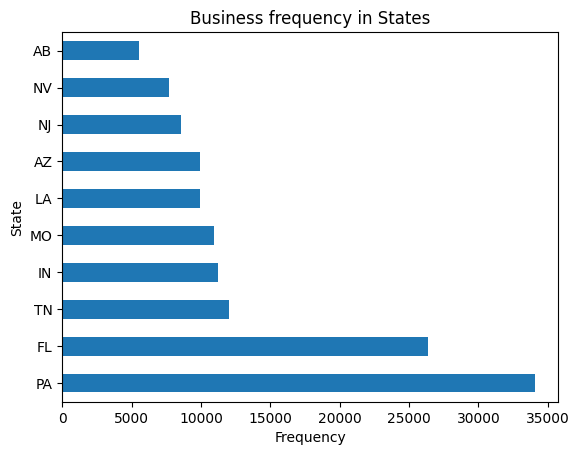

In [9]:
df_busi_state_frequencies = df_business['state'].value_counts()
print("businesses frequencies: ")
df_busi_state_frequencies.head(10).plot(kind='barh' , title='Business frequency in States' , xlabel='Frequency' , ylabel='State')

We found that Pennsylvania state has the highest businesses data in Yelp dataset.

In [11]:
#filter the datasets to only businesses in Pennsylvania
df_busi_PA = df_business[df_business['state'] == 'PA']
#df_busi_PA

---

## Find top 10 cities with most businesses data in Pennsylvania

businesses frequencies: 


<AxesSubplot: title={'center': 'Business frequency in Cities'}, xlabel='Frequency', ylabel='City'>

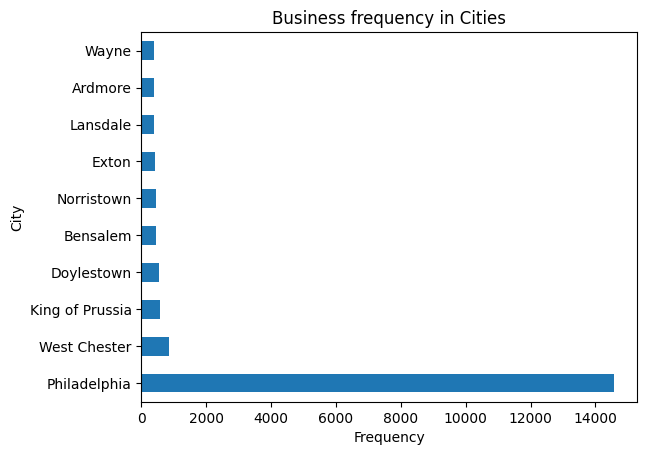

In [12]:
df_busi_city_frequencies = df_busi_PA['city'].value_counts()
print("businesses frequencies: ")
df_busi_city_frequencies.head(10).plot(kind='barh', title='Business frequency in Cities' , xlabel='Frequency' , ylabel='City')

We found that Philadelphia city has the highest businesses data and is significantly higher than other cities in Yelp dataset. This might be due to Yelp's data do not covered well enough in other cities.

In [13]:
#filter the datasets to only businesses in Philadelphia
df_busi_Phil = df_busi_PA[df_busi_PA['city'] == 'Philadelphia']
df_busi_Phil = df_busi_Phil.reset_index(drop=True)
#df_busi_Phil

---

## Create a general category for all businesses  

categories frequencies: 


<AxesSubplot: title={'center': 'Business categories frequency'}, xlabel='Frequency', ylabel='Categories'>

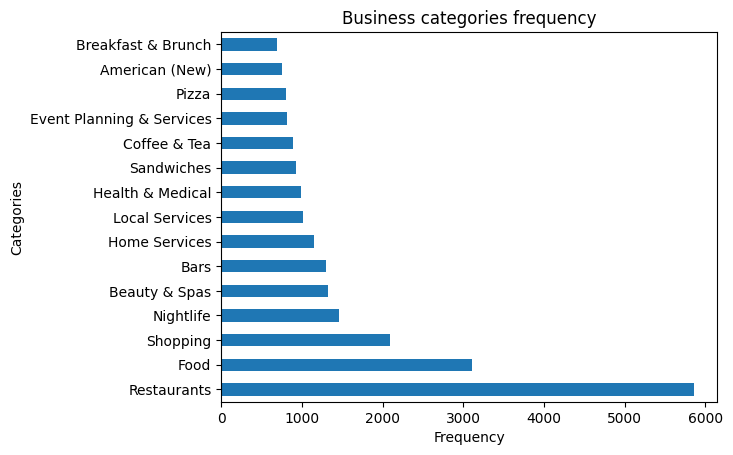

In [14]:
Phil_categories_frequencies = df_busi_Phil.categories.str.split(', ' , expand=True).stack().value_counts()
print("categories frequencies: ")
Phil_categories_frequencies.head(15).plot(kind='barh', title='Business categories frequency' , xlabel='Frequency' , ylabel='Categories')

We have calculated every category types' frequencies and we choose the top 7 most frequent different categories, for example we do not choose 'Food' because it is similar to 'Restaurant'. And for businesses that do not fall in these 7 categories will be classified as our 8th category - 'Other'.

We have excluded:
- Food since it is part of Restaurant category
- Bar since it is part of Nightlife category

In [15]:
new_categories = ["Restaurants" , "Shopping" , "Nightlife" , "Beauty & Spas" , "Home Services" , "Local Services" , "Health & Medical" , "Other"]
df_busi_Phil.insert(14,"general_category" , "-")
df_busi_Phil

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,general_category
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",-
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",-
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",-
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",-
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14562,wPAaAbFbq5wfLfW0gnYU7g,Intermix,1718 Walnut St,Philadelphia,PA,19103,39.950060,-75.170129,2.0,10,0,"{'BusinessParking': '{'garage': False, 'street...","Fashion, Shopping, Women's Clothing","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",-
14563,JDM7kiCEmeBc_5W-z6eZZw,2601 Parkway Apartments,2601 Pennsylvania Ave,Philadelphia,PA,19130,39.968806,-75.180608,3.0,6,1,{'BusinessAcceptsCreditCards': 'True'},"Real Estate, Apartments, Home Services",None,-
14564,9U1Igcpe954LoWZRmNc-zg,Hand & Stone Massage And Facial Spa,"1100 S Columbus Blvd, Ste 24",Philadelphia,PA,19147,39.932756,-75.144504,3.0,32,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Day Spas, Beauty & Spas, Skin Care, Massage","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ...",-
14565,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1",Philadelphia,PA,19103,39.945966,-75.169666,4.5,39,1,"{'ByAppointmentOnly': 'True', 'GoodForKids': '...","Health & Medical, Yoga, Shopping, Naturopathic...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",-


## Assign general category to every businesses

if a business has multiple general categories, then we consider the category with highest frequencies.

In [16]:
isFilled = False
for i in range(len(df_busi_Phil)):
    for j in new_categories:
            if df_busi_Phil.loc[i, "categories"] != None and j in df_busi_Phil.loc[i, "categories"]:
                df_busi_Phil.loc[i, "general_category"] = j
                isFilled = True
                break
    if isFilled == False:
        df_busi_Phil.loc[i, "general_category"] = 'Other'
    else:
        isFilled = False
               

---

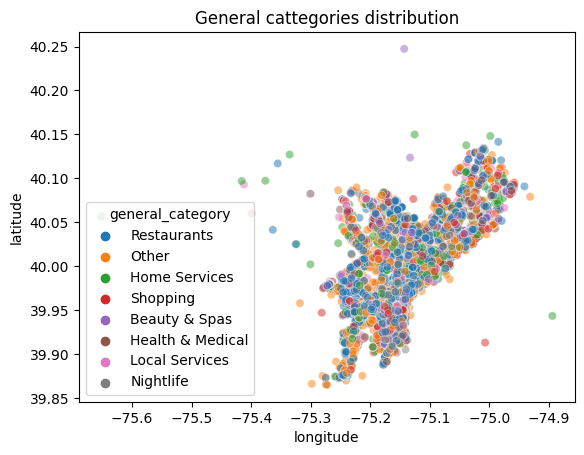

Restaurants         5852
Other               3005
Shopping            2031
Beauty & Spas       1141
Home Services        968
Health & Medical     645
Local Services       528
Nightlife            397
Name: general_category, dtype: int64

In [18]:
sns.scatterplot(data=df_busi_Phil, x="longitude", y="latitude", hue="general_category", alpha=0.5).set(title='General cattegories distribution')
plt.show()

Phil_general_categories_frequencies = df_busi_Phil.general_category.value_counts()
Phil_general_categories_frequencies

As we can see the resulted graph is exactly the map of Philadelphia since we are using the Latitude and Longitude as our axis, businesses in 'Restaurant' categories has the highest frequency in Philadelphia. In the next stage we will only considered the restaurant businesses in Philadelphia.

In [19]:
df_busi_Phil_filtered = df_busi_Phil[df_busi_Phil["general_category"] == 'Restaurants']
#df_busi_Phil_filtered

---

## Clustering the restaurant businesses in Philadelphia with latitude and longitude as features

In [20]:
#keep only latitude , longitude columns
df_busi_Phil_fil_clus = df_busi_Phil_filtered[["longitude" , "latitude"]]
#df_busi_Phil_fil_clus

## Apply K-Means clustering method
### Features : Latitude , longitude

The reason we choose K-Means clustering method is to find out the similarity restaurant types of certain areas. 

We will use 6 clusters.

[[-75.21536967  39.94661156]
 [-75.01337804  40.0863016 ]
 [-75.1992354   40.04046497]
 [-75.07189118  40.04099359]
 [-75.13521623  39.98362935]
 [-75.16207505  39.94527058]]


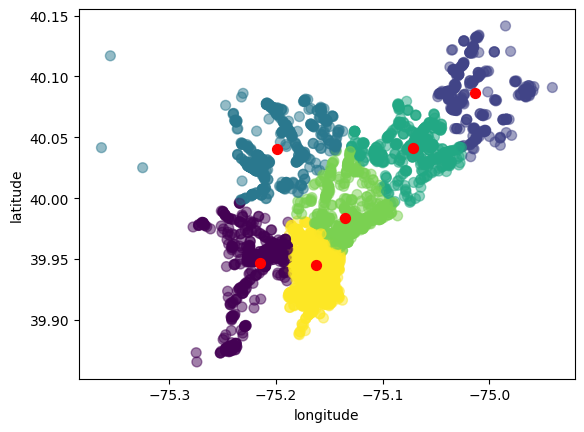

In [21]:
kmeans = KMeans(n_clusters=6).fit(df_busi_Phil_fil_clus) #compute k-means clustering
centroids = kmeans.cluster_centers_ # get cluster center
clusters = kmeans.predict(df_busi_Phil_fil_clus)
df_busi_Phil_filtered.insert(15,"cluster",clusters,True)
print(centroids)

plt.scatter(df_busi_Phil_fil_clus['longitude'], df_busi_Phil_fil_clus['latitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel("longitude")
plt.ylabel("latitude")

plt.show()

---

We use another plot to show ther plot again with cluster label.

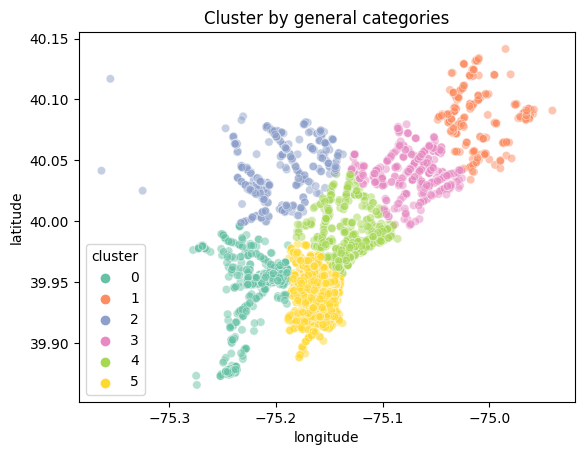

Cluster frequencies: 


Text(0, 0.5, 'Cluster')

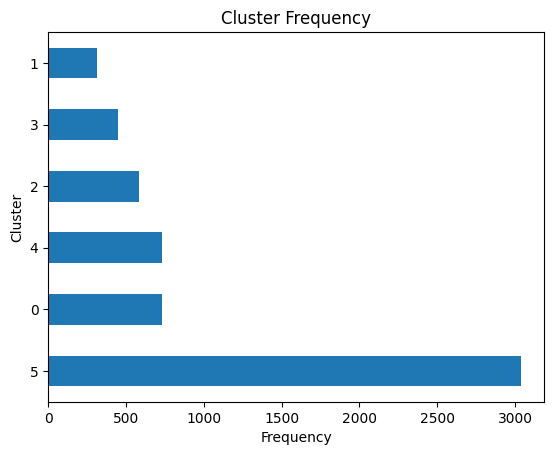

In [23]:
#df_busi_Phil_filtered
sns.scatterplot(data=df_busi_Phil_filtered, x="longitude", y="latitude", hue="cluster", alpha=0.5 , palette="Set2").set(title='Cluster by general categories')
plt.show()

print("Cluster frequencies: ")
cluster_count = df_busi_Phil_filtered.cluster.value_counts().plot(kind='barh' , title='Cluster Frequency')
cluster_count.set_xlabel("Frequency")
cluster_count.set_ylabel("Cluster")

as we can see that there is significant amount of restaurant businesses located in the South Philadelphia and Center City areas (cluster 0), but this result might not be accuarate, because we do not know if Yelp has cover well enough in all areas.

---

## List of categories in each cluster

### Cluster 0

Text(0, 0.5, 'Categories')

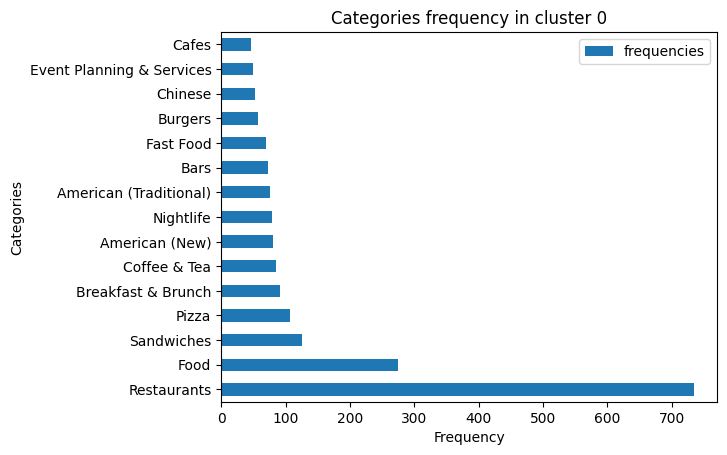

In [25]:
df_busi_Phil_filtered_c0 = df_busi_Phil_filtered[df_busi_Phil_filtered["cluster"] == 0]
df_c0_categories_frequencies = df_busi_Phil_filtered_c0.categories.str.split(', ' , expand=True).stack().value_counts().to_frame()
df_c0_categories_frequencies.rename(columns = {df_c0_categories_frequencies.columns[0]:'frequencies'}, inplace = True)
c0_categories = df_c0_categories_frequencies.head(15).plot(kind='barh', title='Categories frequency in cluster 0')
c0_categories.set_xlabel("Frequency")
c0_categories.set_ylabel("Categories")

Exclude all the general categories, there are good amount of Nightlife businesses in cluster 0 area which has the highest frequencies 662.  

---
### Cluster 1

Text(0, 0.5, 'Categories')

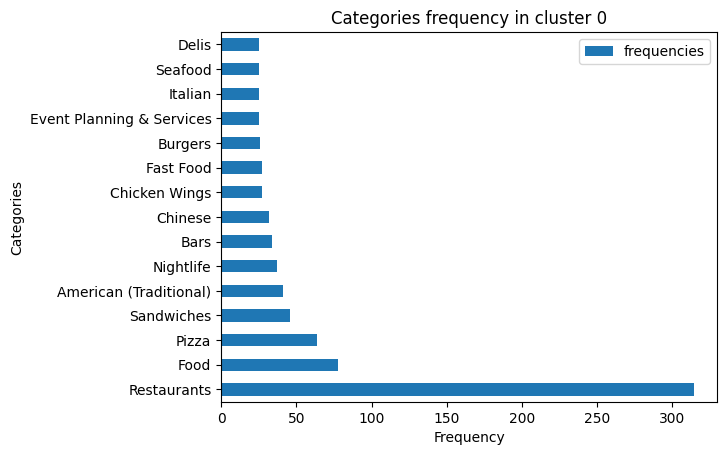

In [26]:
df_busi_Phil_filtered_c1 = df_busi_Phil_filtered[df_busi_Phil_filtered["cluster"] == 1]
df_c1_categories_frequencies = df_busi_Phil_filtered_c1.categories.str.split(', ' , expand=True).stack().value_counts().to_frame()
df_c1_categories_frequencies.rename(columns = {df_c1_categories_frequencies.columns[0]:'frequencies'}, inplace = True)
c1_categories = df_c1_categories_frequencies.head(15).plot(kind='barh', title='Categories frequency in cluster 1')
c1_categories.set_xlabel("Frequency")
c1_categories.set_ylabel("Categories")

---
### Cluster 2

Text(0, 0.5, 'Categories')

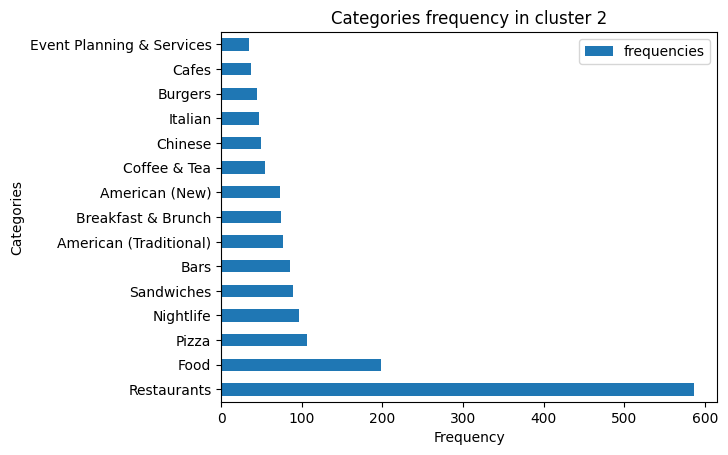

In [27]:
df_busi_Phil_filtered_c2 = df_busi_Phil_filtered[df_busi_Phil_filtered["cluster"] == 2]
df_c2_categories_frequencies = df_busi_Phil_filtered_c2.categories.str.split(', ' , expand=True).stack().value_counts().to_frame()
df_c2_categories_frequencies.rename(columns = {df_c2_categories_frequencies.columns[0]:'frequencies'}, inplace = True)
c2_categories = df_c2_categories_frequencies.head(15).plot(kind='barh', title='Categories frequency in cluster 2')
c2_categories.set_xlabel("Frequency")
c2_categories.set_ylabel("Categories")

---
### Cluster 3

Text(0, 0.5, 'Categories')

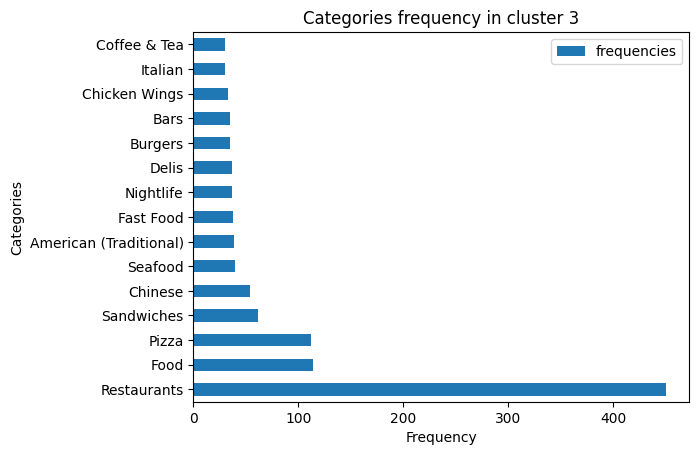

In [28]:
df_busi_Phil_filtered_c3 = df_busi_Phil_filtered[df_busi_Phil_filtered["cluster"] == 3]
df_c3_categories_frequencies = df_busi_Phil_filtered_c3.categories.str.split(', ' , expand=True).stack().value_counts().to_frame()
df_c3_categories_frequencies.rename(columns = {df_c3_categories_frequencies.columns[0]:'frequencies'}, inplace = True)
c3_categories = df_c3_categories_frequencies.head(15).plot(kind='barh', title='Categories frequency in cluster 3')
c3_categories.set_xlabel("Frequency")
c3_categories.set_ylabel("Categories")

---
### Cluster 4

Text(0, 0.5, 'Categories')

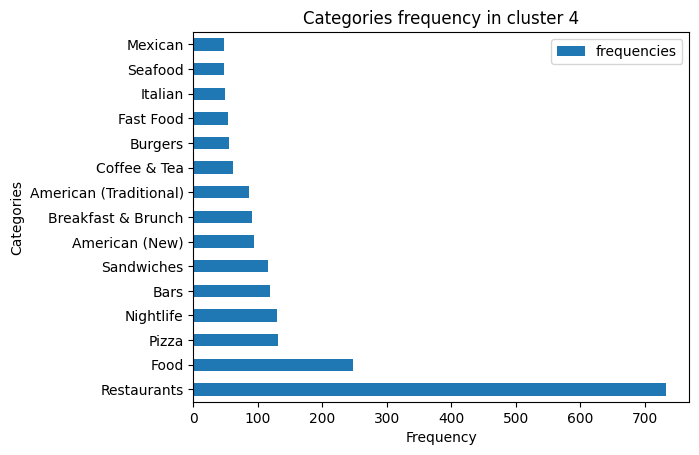

In [29]:
df_busi_Phil_filtered_c4 = df_busi_Phil_filtered[df_busi_Phil_filtered["cluster"] == 4]
df_c4_categories_frequencies = df_busi_Phil_filtered_c4.categories.str.split(', ' , expand=True).stack().value_counts().to_frame()
df_c4_categories_frequencies.rename(columns = {df_c4_categories_frequencies.columns[0]:'frequencies'}, inplace = True)
c4_categories = df_c4_categories_frequencies.head(15).plot(kind='barh' , title='Categories frequency in cluster 4')
c4_categories.set_xlabel("Frequency")
c4_categories.set_ylabel("Categories")

---
### Cluster 5

Text(0, 0.5, 'Categories')

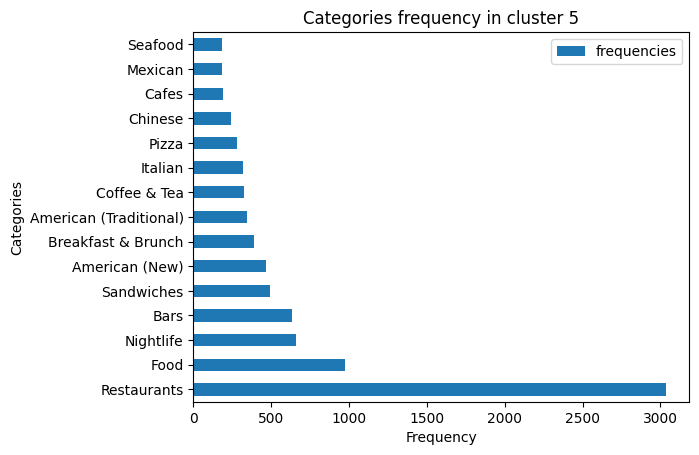

In [31]:
df_busi_Phil_filtered_c5 = df_busi_Phil_filtered[df_busi_Phil_filtered["cluster"] == 5]
df_c5_categories_frequencies = df_busi_Phil_filtered_c5.categories.str.split(', ' , expand=True).stack().value_counts().to_frame()
df_c5_categories_frequencies.rename(columns = {df_c5_categories_frequencies.columns[0]:'frequencies'}, inplace = True)
c5_categories = df_c5_categories_frequencies.head(15).plot(kind='barh' , title='Categories frequency in cluster 5')
c5_categories.set_xlabel("Frequency")
c5_categories.set_ylabel("Categories")

---

## Randomly select 500 restaurant businesses from cluster 0 area 

In [22]:
df_busi_Phil_ran500 = df_busi_Phil_filtered[df_busi_Phil_filtered["cluster"] == 0].sample(n=500)
del df_busi_Phil_ran500["cluster"]
#df_busi_Phil_ran500

## Export to csv

In [24]:
df_busi_Phil_ran500.to_csv('Filtered_Restaurant_Dataset.csv', index=False)

---